# Introduction to Financial Portfolios - Risk & Return with Python
## Read more on QuantJam: https://medium.com/quantjam

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from tqdm import tqdm

In [2]:
# settings",
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)
np.random.seed(777)
DPI=300
LW = 3
plt.rcParams['figure.figsize'] = (11, 8)
plt.style.use('fivethirtyeight')

In [3]:
def Returns(weights, mean_returns):
    # Annualized return
    return np.sum(np.multiply(mean_returns, weights)) * 252

def STD(weights, cov_matrix):
    # Portoflio annualized standard deviation
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

def Sharpe(weights, mean_returns, cov_matrix,risk_free_retrun):
    # sharpe ratio: (mean portfolio return - risk free return)/portfolio standard deviation
    returns = Returns(weights, mean_returns)
    std = STD(weights, cov_matrix)
    return (returns-risk_free_retrun)/std

In [4]:
def Download(symbols):
    # data downloader 
    data = []
    for i in tqdm(range(len(symbols))):
        sym = symbols[i]
        stock = web.DataReader(sym, 'yahoo', start, end)['Adj Close']
        stock.name = sym
        data.append(pd.DataFrame(stock))
    data = pd.concat(data, axis=1)
    return data

In [6]:
symbols=['AAPL','AMZN','GOOGL','TSLA']
# start and end of period
start = datetime(2016, 1, 1)
end = datetime(2017, 12, 31)

In [7]:
data=Download(symbols)

100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


In [8]:
# Weights of Portfolio A and B
weights_A=[0.39132873, 0.10853414, 0.40580553, 0.0943316 ]
weights_B=[0.00493043, 0.07654428, 0.0327875 , 0.88573779]

In [13]:
returns= data.pct_change().dropna() 
mean_returns = data.pct_change().dropna().mean()
cov_matrix = data.pct_change().cov()

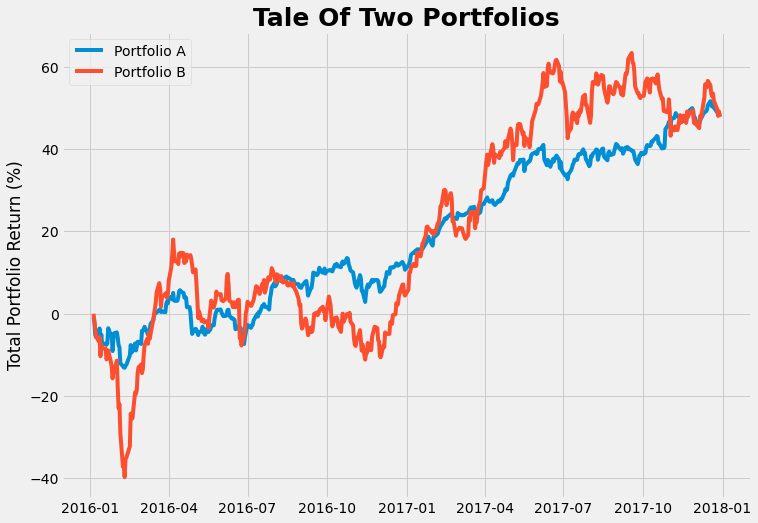

In [11]:
plt.plot(returns.index,np.nancumsum(np.nansum(returns*weights_A,axis=1))*100,label='Portfolio A')
plt.plot(returns.index,np.nancumsum(np.nansum(returns*weights_B,axis=1))*100,label='Portfolio B')
plt.legend()
plt.ylabel('Total Portfolio Return (%)')
plt.title('Tale Of Two Portfolios',fontweight='bold',fontsize=25)
plt.savefig(os.path.join('./plots/', 'risk_reward.png'), dpi=DPI, bbox_inches='tight')

In [15]:
sharpe_A=Sharpe(np.array(weights_A), mean_returns, cov_matrix,risk_free_retrun=0.015)
sharpe_B=Sharpe(np.array(weights_B), mean_returns, cov_matrix,risk_free_retrun=0.015)

In [17]:
compare=pd.DataFrame(columns=['Sharpe Ratio'],index=['Portfolio A','Portfolio B'])
compare.loc['Portfolio A','Sharpe Ratio']=np.round(sharpe_A,2)
compare.loc['Portfolio B','Sharpe Ratio']=np.round(sharpe_B,2)

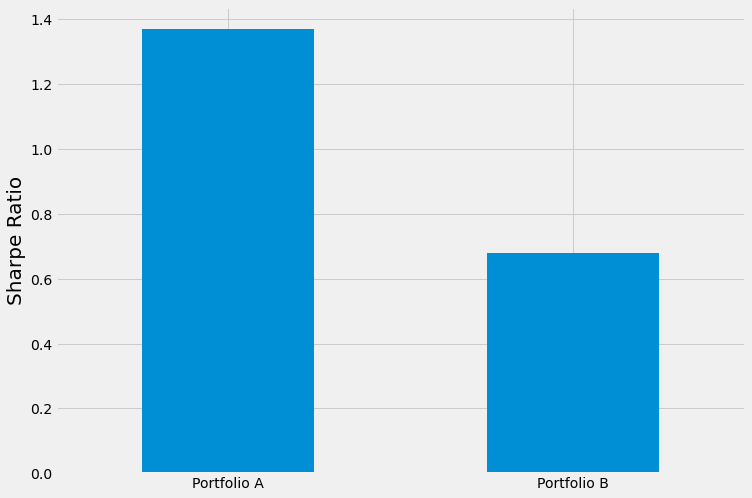

In [21]:
compare.plot(kind='bar',legend=None,rot=0)
plt.ylabel('Sharpe Ratio',fontsize=20)
plt.savefig(os.path.join('./plots/', 'sharpe_bar.png'), dpi=100, bbox_inches='tight')

# Relationship Between Sharpe Ratio and Standard Deviation

In [22]:
std=list(np.linspace(start=0.1,stop=3,num=50))
dfs=[]
for excess_return in list([1,2,3,4,5]):
    df_case=pd.DataFrame(columns=['Standard Deviation','Sharpe Ratio','Excess Return'])
    df_case['Standard Deviation']=std
    df_case['Sharpe Ratio']=np.divide(excess_return,std)
    df_case['Excess Return']=excess_return
    dfs.append(df_case)
dfs=pd.concat(dfs,axis=0,ignore_index=True)

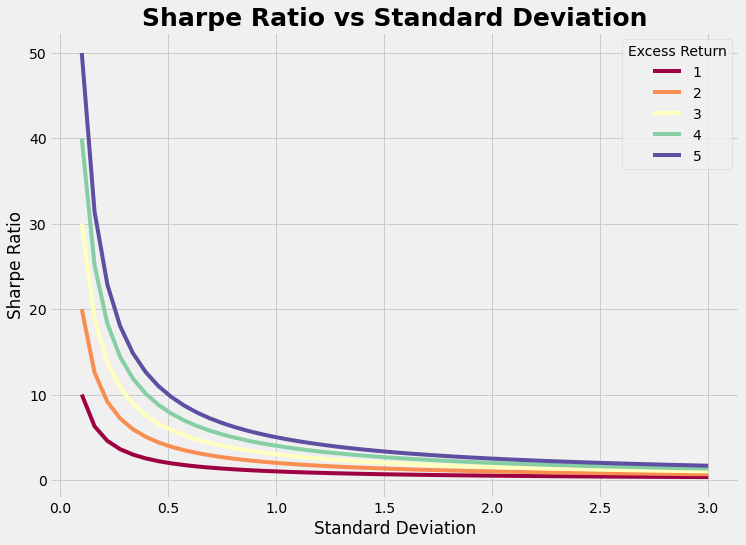

In [23]:
sns.lineplot(x='Standard Deviation',y='Sharpe Ratio',hue='Excess Return',data=dfs,palette=sns.color_palette("Spectral", as_cmap=True))
plt.title('Sharpe Ratio vs Standard Deviation',fontweight='bold',fontsize=25)
plt.savefig(os.path.join('./plots/', 'sharpe.png'), dpi=DPI, bbox_inches='tight')